## Лабораторая работа 7

**Задача:** Применить PCA и факторный анализ для выявления латентых факторов


### Описание датасета "Predict Online Gaming Behavior Dataset"
Этот набор данных фиксирует комплексные метрики и демографию, связанные с поведением игроков в онлайн-игровых средах. Он включает такие переменные, как демография игроков, детали, характерные для игры, метрики вовлеченности и целевую переменную, отражающую удержание игроков.


| **Переменная** | **Описание** |
|----------------|--------------|
| **PlayerID**   | Уникальный идентификатор для каждого игрока. |
| **Age**        | Возраст игрока. |
| **Gender**     | Пол игрока. |
| **Location**   | Географическое местоположение игрока. |
| **GameGenre**  | Жанр игры, в которой участвует игрок. |
| **PlayTimeHours** | Среднее количество часов, проведенных за игрой за одну сессию. |
| **InGamePurchases** | Признак того, делает ли игрок внутриигровые покупки (0 — Нет, 1 — Да). |
| **GameDifficulty** | Уровень сложности игры. |
| **SessionsPerWeek** | Количество игровых сессий в неделю. |
| **AvgSessionDurationMinutes** | Средняя продолжительность каждой игровой сессии в минутах. |
| **PlayerLevel** | Текущий уровень игрока в игре. |
| **AchievementsUnlocked** | Количество достижений, разблокированных игроком. |
| **EngagementLevel** | Категоризированный уровень вовлеченности, отражающий удержание игроков ('Высокий', 'Средний', 'Низкий'). |


Целевая переменная — EngagementLevel — указывает на уровень вовлеченности игрока и категоризируется как 'Высокий', 'Средний' или 'Низкий'.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

### Преобразование данных

In [ ]:
df = pd.read_csv('../online_gaming_behavior_dataset.csv')

In [7]:
df = pd.read_csv('../online_gaming_behavior_dataset.csv')
engagement_map = {'Low': 0, 'Medium': 1, 'High': 2}
difficult_map = {'Easy': 0, 'Medium': 1, 'Hard': 2}
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_map)
df['GameDifficulty'] = df['GameDifficulty'].map(difficult_map)

columns_to_use = ["Age", "PlayTimeHours", "InGamePurchases", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked", "GameDifficulty"]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[columns_to_use])

In [8]:
data_scaled

array([[ 1.09602286,  0.61417626, -0.50133445, ...,  1.02645899,
         0.0328139 ,  0.38399949],
       [-0.29796885, -0.93981568, -0.50133445, ..., -1.35215957,
        -1.00664781,  0.38399949],
       [-0.9949647 , -0.54965389, -0.50133445, ..., -0.51264714,
         1.14157306, -0.89633995],
       ...,
       [-1.69196056, -1.70427661,  1.99467641, ..., -0.72252525,
        -1.63032484, -0.89633995],
       [ 0.19988533,  0.28829818,  1.99467641, ...,  0.71164183,
        -1.00664781,  0.38399949],
       [-1.29367721, -0.28064897, -0.50133445, ...,  0.7816012 ,
         1.00297817, -0.89633995]])

### Применение PCA


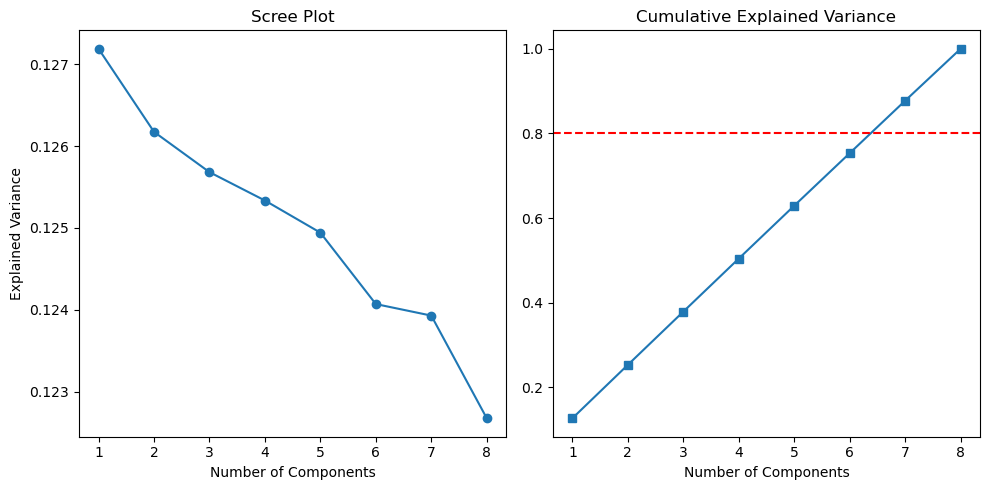

In [10]:
# Применение PCA
pca = PCA()
pca_components = pca.fit_transform(data_scaled)

# Анализ объясненной дисперсии
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Визуализация
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 's-')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.tight_layout()
plt.show()

In [11]:
# Выбор числа компонент (пример для 3 компонент)
n_components = 3
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(data_scaled)

# Анализ нагрузок PCA
pca_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=columns_to_use
)
print("PCA Loadings:")
print(pca_loadings)

PCA Loadings:
                                PC1       PC2       PC3
Age                        0.194914 -0.463516 -0.541066
PlayTimeHours             -0.349061 -0.308890 -0.240003
InGamePurchases            0.486625  0.043159  0.219683
SessionsPerWeek            0.504955 -0.233511 -0.376085
AvgSessionDurationMinutes -0.026917  0.417352 -0.059056
PlayerLevel                0.518633  0.053118  0.284545
AchievementsUnlocked       0.102591 -0.510512  0.492898
GameDifficulty             0.261059  0.442406 -0.364066


### Применение факторного анализа

In [13]:
# Применение факторного анализа
fa = FactorAnalysis(n_components=n_components, rotation='varimax', max_iter=1000)
fa_components = fa.fit_transform(data_scaled)

# Анализ нагрузок FA
fa_loadings = pd.DataFrame(
    fa.components_.T,
    columns=[f'Factor{i+1}' for i in range(n_components)],
    index=columns_to_use
)
print("\nFactor Analysis Loadings:")
print(fa_loadings)


Factor Analysis Loadings:
                            Factor1   Factor2   Factor3
Age                       -0.000758 -0.017916 -0.102828
PlayTimeHours              0.019696 -0.059339 -0.003239
InGamePurchases            0.001243  0.068654 -0.016439
SessionsPerWeek            0.009231  0.049950 -0.092912
AvgSessionDurationMinutes -0.015766  0.011556  0.018746
PlayerLevel                0.032195  0.093631 -0.007579
AchievementsUnlocked       0.154972  0.005419 -0.002104
GameDifficulty            -0.034286  0.048022 -0.002973


### Визуализация

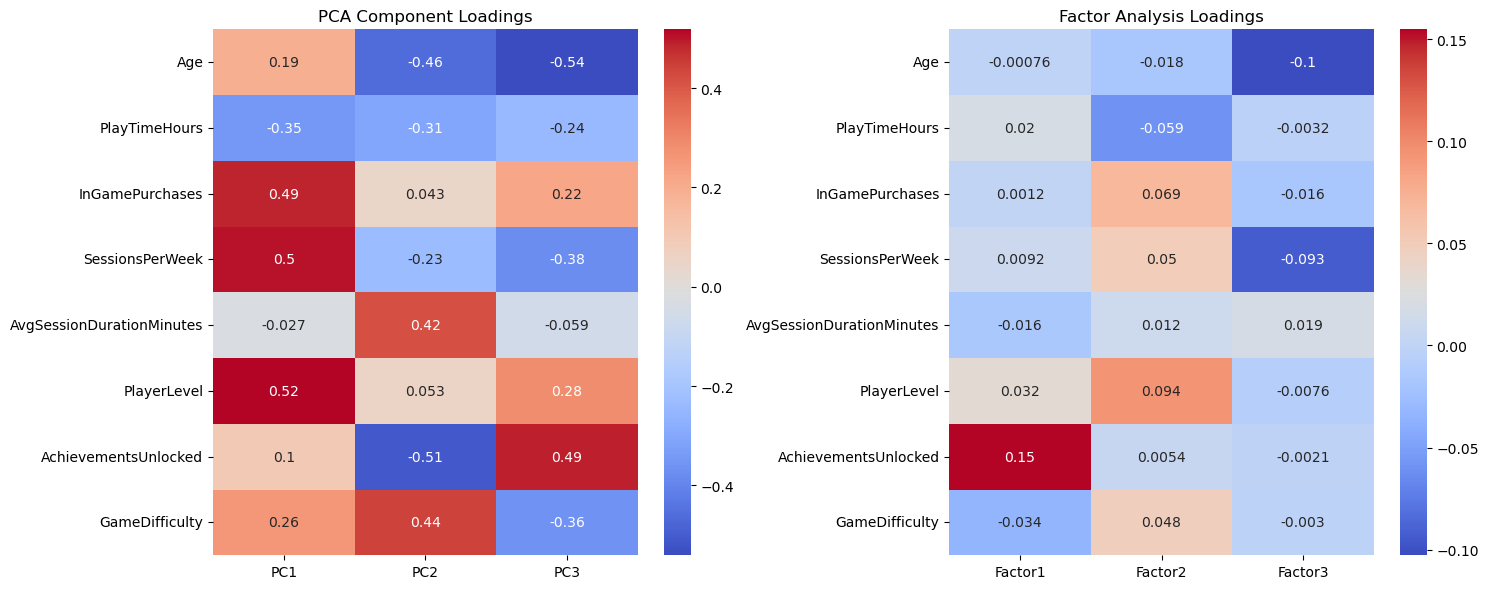

In [14]:
# Визуализация нагрузок
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# PCA
sns.heatmap(pca_loadings, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('PCA Component Loadings')

# FA
sns.heatmap(fa_loadings, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Factor Analysis Loadings')

plt.tight_layout()
plt.show()

### Вывод

#### Вывод по PCA

**PC1 (Интенсивность игровых сессий):**
1. Положительные нагрузки на SessionsPerWeek, PlayerLevel и InGamePurchases указывают на то, что этот компонент отражает интенсивность игровых сессий и вовлеченность игрока.
2. Отрицательная нагрузка на PlayTimeHours может свидетельствовать о том, что игроки с высокой частотой сессий проводят меньше времени за одной игровой сессией.

**PC2 (Прогресс в игре):**
1. Положительные нагрузки на GameDifficulty и Age, а также отрицательная нагрузка на AchievementsUnlocked указывают на то, что этот компонент связан с прогрессом игрока и его опытом в игре.
2. Игроки старшего возраста и те, кто предпочитает более сложные игры, имеют более высокие значения по этому компоненту.

**PC3 (Демография и монетизация):**
1. Положительные нагрузки на Age и InGamePurchases, а также отрицательная нагрузка на GameDifficulty указывают на то, что этот компонент связан с демографическими характеристиками и склонностью к внутриигровым покупкам.
2. Игроки старшего возраста чаще совершают внутриигровые покупки и предпочитают менее сложные игры.

#### Вывод по факторному анализу

Значения нагрузок в факторном анализе получились очень маленькие, что указывает на то, что факторный анализ не выявил значимых латентных факторов в данных. 